Libraries:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re

Load dataset:

In [2]:
train_df = pd.read_csv("Dataset/train.csv")
test_df = pd.read_csv("Dataset/test.csv")

In [3]:
train_df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


Preprocessing:

Check null values:

In [4]:
print("Training dataset:\n",train_df.isnull().sum())
print("Testing dataset:\n",test_df.isnull().sum())

Training dataset:
 Class Index    0
Title          0
Description    0
dtype: int64
Testing dataset:
 Class Index    0
Title          0
Description    0
dtype: int64


Check duplicates:

In [5]:
print("Training dataset:",train_df.duplicated().sum())
print("Testing dataset:",test_df.duplicated().sum())

Training dataset: 0
Testing dataset: 0


Combine title and text:

In [6]:
train_df["news"] = train_df['Title'] + " "+ train_df['Description']
test_df["news"] = test_df['Title'] + " "+ test_df['Description']

Cleaning:

In [7]:
def textCleaning(text):
    text = text.lower()
    text = re.sub(r'\S*[\\/]\S*',"",text)
    text = re.sub(r'[^a-z\s]',"",text)
    text = re.sub(r'https\S+',"",text)
    text =  re.sub(r'\s+'," ",text)
    return text
train_df['clean_news'] = train_df['news'].apply(textCleaning)
test_df['clean_news'] = test_df['news'].apply(textCleaning)


Tokenize and remove stop words:

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def tokenize(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokenize_text = [word for word in tokens if word not in stop_words ]
    return tokenize_text

train_df['tokenize_news'] = train_df['clean_news'].apply(tokenize)
test_df['tokenize_news'] = test_df['clean_news'].apply(tokenize)

TFIDF:

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
train_df['tokenize_news_str'] = train_df['tokenize_news'].apply(lambda x: " ".join(x))
test_df['tokenize_news_str'] = test_df['tokenize_news'].apply(lambda x: " ".join(x))
vectorizer = TfidfVectorizer(max_features=5000)
train_tfidf_matrix = vectorizer.fit_transform(train_df['tokenize_news_str'])
test_tfidf_matrix = vectorizer.transform(test_df['tokenize_news_str'])

Model:

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)

Training:

In [52]:
model.fit(train_tfidf_matrix,train_df['Class Index'])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


Evaluation:

In [53]:
pred = model.predict(test_tfidf_matrix)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy score:", accuracy_score(test_df['Class Index'],pred))
print("\nClassification Report:\n", classification_report(test_df['Class Index'], pred))
cm = confusion_matrix(test_df['Class Index'], pred)
print("\nConfusion Matrix:\n", cm)

Accuracy score: 0.9032894736842105

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.98      0.96      1900
           3       0.87      0.87      0.87      1900
           4       0.88      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600


Confusion Matrix:
 [[1709   63   76   52]
 [  23 1854   11   12]
 [  60   20 1653  167]
 [  66   22  163 1649]]


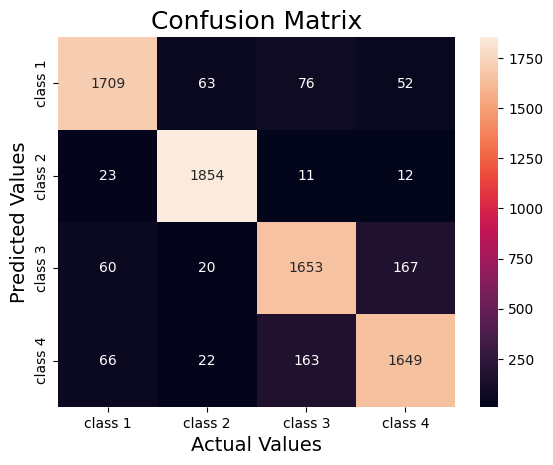

In [54]:
sns.heatmap(cm,fmt='d',annot=True,xticklabels=("class 1","class 2","class 3","class 4"),yticklabels=("class 1","class 2","class 3","class 4"))
plt.title("Confusion Matrix", fontsize = 18)
plt.xlabel("Actual Values", fontsize = 14)
plt.ylabel("Predicted Values", fontsize = 14)
plt.show()

In [55]:
news = 'Google announced the release of its next-generation artificial intelligence model during its annual developer conference in California. The new system promises significant improvements in natural language processing, real-time translation, and advanced coding assistance. Tech experts have hailed the launch as a major step toward integrating AI into everyday applications, from healthcare diagnostics to financial analysis. Google executives highlighted the model’s reduced energy consumption, emphasizing the company’s commitment to sustainable innovation. The announcement sparked enthusiasm among developers, many of whom expect the new model to transform industries reliant on automation and data-driven insights.'
clean  = textCleaning(news)
tokenizetext = tokenize(clean)
join = " ".join(tokenizetext)
matrix = vectorizer.transform([join])
pred = model.predict(matrix)
pred

array([4])

pkl files

In [59]:

import joblib
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(model, "model.pkl")

['model.pkl']